## AI Engineer - Generative Adversarial Networks zur Generierung von Sneaker Bildern (SneakerGAN)

## Eine Projektarbeit von Alexander Botov

Implementierung eines GAN mit PyTorch. Verwendet wird ein bildlicher Datensatz SneakerGAN https://github.com/Vilagamer999/SneakGAN/tree/main/dataset


### Import Libraries

In [1]:
from torchvision.utils import save_image
from torchvision import datasets, transforms
from torch.autograd import Variable
from torchvision import datasets, transforms
from PIL import Image

from torch.utils.data import Dataset, DataLoader

import os
import pickle as pkl
import torch.optim as optim
import torch.nn.functional as F
import torch.nn as nn

import torch
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

# Device configuration.
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

### Vorverarbeitungsschleife um Dataset zu vereinheitlichen auf RGB

In [2]:


def convert_images_to_rgb(input_folder, output_folder):
    """
    Konvertiert alle Bilder im Eingabeordner in das RGB-Format und speichert sie im Ausgabeordner.

    Args:
        input_folder (str): Pfad zum Eingabeordner mit den Bildern.
        output_folder (str): Pfad zum Ausgabeordner für die konvertierten Bilder.
    """
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    for filename in os.listdir(input_folder):
        if filename.endswith(('.png', '.jpg', '.jpeg', '.bmp', '.tiff')):
            filepath = os.path.join(input_folder, filename)
            with Image.open(filepath) as img:
                # Überprüfen, ob das Bild bereits im RGB-Format ist
                if img.mode != 'RGB':
                    img = img.convert('RGB')
                    # Speichern des konvertierten Bildes im Ausgabeordner
                    output_path = os.path.join(output_folder, filename)
                    img.save(output_path)
                    print(f"Bild {filename} wurde konvertiert und gespeichert.")
                else:
                    # Bild ist bereits im RGB-Format, also einfach kopieren
                    output_path = os.path.join(output_folder, filename)
                    img.save(output_path)
                    print(f"Bild {filename} ist bereits im RGB-Format und wurde kopiert.")
        else:
            print(f"Datei {filename} ist kein unterstütztes Bildformat.")



# Beispiel für die Verwendung der Funktion
input_folder = 'C:\\Users\\aboto\\degethic-tutorial-february-2024\\SneakGAN\\dataset'
output_folder = 'C:\\Users\\aboto\\degethic-tutorial-february-2024\\SneakGAN\\dataset'
convert_images_to_rgb(input_folder, output_folder)


Bild 0.png ist bereits im RGB-Format und wurde kopiert.
Bild 1.png ist bereits im RGB-Format und wurde kopiert.
Bild 10.png ist bereits im RGB-Format und wurde kopiert.
Bild 100.png ist bereits im RGB-Format und wurde kopiert.
Bild 101.png ist bereits im RGB-Format und wurde kopiert.
Bild 102.png ist bereits im RGB-Format und wurde kopiert.
Bild 103.png ist bereits im RGB-Format und wurde kopiert.
Bild 104.png ist bereits im RGB-Format und wurde kopiert.
Bild 105.png ist bereits im RGB-Format und wurde kopiert.
Bild 106.png ist bereits im RGB-Format und wurde kopiert.
Bild 107.png ist bereits im RGB-Format und wurde kopiert.
Bild 108.png ist bereits im RGB-Format und wurde kopiert.
Bild 109.png ist bereits im RGB-Format und wurde kopiert.
Bild 11.png ist bereits im RGB-Format und wurde kopiert.
Bild 110.png ist bereits im RGB-Format und wurde kopiert.
Bild 111.png ist bereits im RGB-Format und wurde kopiert.
Bild 112.png ist bereits im RGB-Format und wurde kopiert.
Bild 113.png ist ber

### Load Data

In [3]:

# Number of subprocesses to use for data loading.
num_workers = 0
# How many samples per batch to load.
batch_size = 64


class CustomDataset(Dataset):
    def __init__(self, root_dir, transform=None):
        self.root_dir = root_dir
        self.transform = transform
        self.images = os.listdir(root_dir)

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_name = os.path.join(self.root_dir, self.images[idx])
        image = Image.open(img_name)

        if self.transform:
            image = self.transform(image)

        return image

# Definiere Transformationsfunktionen
transform = transforms.Compose([
    transforms.Resize((28, 28)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5], std=[0.5])
])


train_data_path = 'C:\\Users\\aboto\\degethic-tutorial-february-2024\\SneakGAN\\dataset'
train_dataset = CustomDataset(train_data_path, transform=transform)

# Iteriere über jedes Bild im Dataset
for i in range(len(train_dataset)):
    # Lade das Bild
    image = train_dataset[i]

    # Überprüfe, ob das Bild im CMYK-Modus ist
    if image.mode == 'CMYK':
        # Wandle das Bild in den RGB-Modus um
        image = image.convert('RGB')

        # Speichere das umgewandelte Bild zurück in das Dataset
        train_dataset[i] = image


train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)





### Überprüfung ob der Pfad zu den Daten existiert und die Daten .....

In [4]:
import os
from PIL import Image

# Pfad zum Bilder-Verzeichnis
data_path = 'C:\\Users\\aboto\\degethic-tutorial-february-2024\\SneakGAN\\dataset'

# Überprüfen, ob der Pfad existiert
if not os.path.exists(data_path):
    print(f"Pfad {data_path} existiert nicht.")
else:
    # Auflisten der Dateien im Verzeichnis
    files = os.listdir(data_path)
    if not files:
        print(f"Keine Dateien im Verzeichnis {data_path} gefunden.")
    else:
        print(f"Dateien im Verzeichnis {data_path}: {files[:10]}")  # Liste der ersten 10 Dateien

        # Überprüfen, ob die Dateien Bilddateien sind und ob sie geöffnet werden können
        for file_name in files:
            file_path = os.path.join(data_path, file_name)
            try:
                with Image.open(file_path) as img:
                    img.verify()  # Überprüfen, ob die Datei eine gültige Bilddatei ist
                print(f"{file_name} ist eine gültige Bilddatei.")
            except Exception as e:
                print(f"Fehler beim Öffnen der Datei {file_name}: {e}")

print("Überprüfung abgeschlossen.")


Dateien im Verzeichnis C:\Users\aboto\degethic-tutorial-february-2024\SneakGAN\dataset: ['0.png', '1.png', '10.png', '100.png', '101.png', '102.png', '103.png', '104.png', '105.png', '106.png']
0.png ist eine gültige Bilddatei.
1.png ist eine gültige Bilddatei.
10.png ist eine gültige Bilddatei.
100.png ist eine gültige Bilddatei.
101.png ist eine gültige Bilddatei.
102.png ist eine gültige Bilddatei.
103.png ist eine gültige Bilddatei.
104.png ist eine gültige Bilddatei.
105.png ist eine gültige Bilddatei.
106.png ist eine gültige Bilddatei.
107.png ist eine gültige Bilddatei.
108.png ist eine gültige Bilddatei.
109.png ist eine gültige Bilddatei.
11.png ist eine gültige Bilddatei.
110.png ist eine gültige Bilddatei.
111.png ist eine gültige Bilddatei.
112.png ist eine gültige Bilddatei.
113.png ist eine gültige Bilddatei.
114.png ist eine gültige Bilddatei.
115.png ist eine gültige Bilddatei.
116.png ist eine gültige Bilddatei.
117.png ist eine gültige Bilddatei.
118.png ist eine gül

### Überprüfung Datenformat nach der Transformation

In [5]:
# Überprüfen der Daten im Dataset
def check_image_sizes(dataset):
    for idx in range(len(dataset)):
        image = dataset[idx]
        if image.size() != (3, 28, 28):
            print(f"Abweichende Bildgröße für Bild {idx}: {image.size()}")


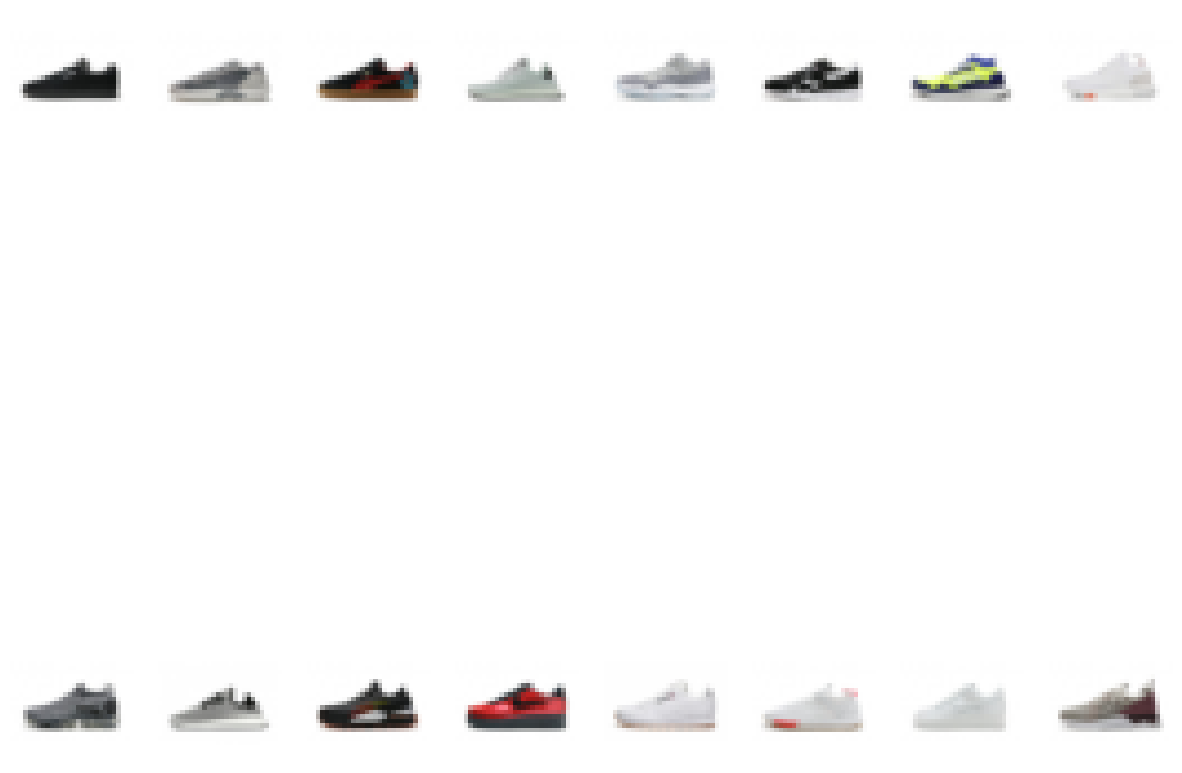

In [6]:
# Funktion zur Visualisierung der Bilder
def show_images(images, ncols=8):
    nrows = len(images) // ncols + int(len(images) % ncols != 0)
    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 15))
    for i, img in enumerate(images):
        ax = axes.flat[i]
        img = img.numpy().transpose(1, 2, 0)  # Von (C, H, W) zu (H, W, C)
        img = (img * 0.5) + 0.5  # Rücknormalisierung auf [0, 1]
        ax.imshow(img)
        ax.axis('off')
    # Leere Achsen ausblenden
    for j in range(i + 1, nrows * ncols):
        fig.delaxes(axes.flat[j])
    plt.show()

# Holen Sie sich einige Beispielbilder aus dem Dataset
example_images = [train_dataset[i] for i in range(16)]
show_images(example_images)

In [7]:
# Filtern der Daten
def filter_dataset(dataset):
    filtered_indices = []
    for idx in range(len(dataset)):
        image = dataset[idx]
        if image.size() == (3, 28, 28):
            filtered_indices.append(idx)
    return Subset(dataset, filtered_indices)

In [8]:
# Laden eines Batches von Bildern aus dem DataLoader
batch_images = next(iter(train_loader))

# Überprüfe die Form des ersten Bildes im Batch
first_image_shape = batch_images[0].shape

print("Form des ersten Bildes im Batch:", first_image_shape)


Form des ersten Bildes im Batch: torch.Size([3, 28, 28])


### Überprüfung Train Loader

In [9]:
# Überprüfen des Typs des train_loader-Datasets
print(type(train_loader.dataset))

# Überprüfen der Transformationen des train_datasets
print(train_dataset.transform)


<class '__main__.CustomDataset'>
Compose(
    Resize(size=(28, 28), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
    Normalize(mean=[0.5], std=[0.5])
)


### Network Architecture

In [10]:
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()

        # Input and hidden linear layers.
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)

        # Final output layer.
        self.fc4 = nn.Linear(hidden_dim*4, output_size)

        # Dropout layer for regularization.
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):

        # Leaky relu to help with gradient flow.
        x = F.leaky_relu(self.fc1(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)

        # Final layer with tanh acrivation to be in range [-1,1].
        out = F.tanh(self.fc4(x))
        return out

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    m.bias.data.fill_(0.01)

class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()

        # Input and hidden linear layers.
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)

        # Final output layer.
        self.fc4 = nn.Linear(hidden_dim, output_size)

        # Dropout layer for regularization.
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):

        # Flatten the image.
        x = x.view(-1, 28*28)

        x = F.leaky_relu(self.fc1(x), 0.2)  # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)

        out = self.fc4(x)
        return out

    def init_weights(self):
        for m in self.modules():
            if isinstance(m, nn.Linear):
                nn.init.xavier_uniform_(m.weight)
                if m.bias is not None:
                    m.bias.data.fill_(0.01)

### Initiate Hyperparameters, losses and optimizer

In [11]:
# Discriminator hyperparameter:

# Size of input image to discriminator (28*28).
input_size = 784
# Size of discriminator output (real or fake).
d_output_size = 1
# Size of last hidden layer in the discriminator.
d_hidden_size = 32

# Generator hyperparamter:

# Size of latent vector to give to generator.
z_size = 100
# Size of generator output (generated image).
g_output_size = 784
# Size of first hidden layer in the generator.
g_hidden_size = 32


# Initialize discriminator and generator.
D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)


# Calculate losses.
def real_loss(D_out):
    batch_size = D_out.size(0)
    # real labels = 1.
    labels = torch.ones(batch_size)
    criterion = nn.BCEWithLogitsLoss()
    # Calculate loss.
    loss = criterion(D_out.squeeze(), labels)
    return loss


def fake_loss(D_out):
    batch_size = D_out.size(0)
     # fake labels = 0.
    labels = torch.zeros(batch_size)
    criterion = nn.BCEWithLogitsLoss()
    # Calculate loss.
    loss = criterion(D_out.squeeze(), labels)
    return loss


# Learning rate.
lr = 0.002

# Create optimizers for the discriminator and generator.
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)


### Implementierung eines Training Loop

In [12]:

# Lists to keep track of progress
img_list = []
G_losses = []
D_losses = []
iters = 0

# Training epochs.
num_epochs = 100


# Keep track of loss and generated fake samples.
samples = []
losses = []

# Get some fixed data for sampling. These are images that are held constant throughout training,
# and allow us to inspect the model's performance.
sample_size = 16
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()

# Train the network.
D.train()
G.train()
# Train networks in epochs.

print("Starting Training Loop...")
# For each epoch
for epoch in range(num_epochs):
    # Feed data as batches to the network.
    #for batch_i, (real_images, _) in enumerate(train_loader):

    for batch_i, (real_images, *_) in enumerate(train_loader):
        real_images = real_images * 2 - 1
        # Weiterer Code...

        # Train discriminator.
        d_optimizer.zero_grad()

        # Train with real images.

        # Compute the discriminator losses on real images.
        D_real = D(real_images)
        d_real_loss = real_loss(D_real)

        # Train with fake images.

        # Generate fake images.
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)

        # Compute the discriminator losses on fake images.
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)

        # Add up loss and perform backpropagation.
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()


        # Train generator.
        g_optimizer.zero_grad()

        # Train with fake images and flipped labels.
        # Generate fake images.
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        fake_images = G(z)

        # Compute the discriminator losses on fake images using flipped labels.
        D_fake = D(fake_images)
        # Use real loss to flip labels.
        g_loss = real_loss(D_fake)

        # Perform backpropagation.
        g_loss.backward()
        g_optimizer.step()

    # Print discriminator and generator losses.
    print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
            epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    # Append discriminator loss and generator losses.
    losses.append((d_loss.item(), g_loss.item()))

    # Generate and save fake images samples.

    # Eval mode for generating samples.
    G.eval()
    samples_z = G(fixed_z)
    samples.append(samples_z)
    # Back to train mode.
    G.train()


# Save training generator samples.
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)


Starting Training Loop...
Epoch [    1/  100] | d_loss: 0.7386 | g_loss: 1.6446
Epoch [    2/  100] | d_loss: 1.1969 | g_loss: 0.4697
Epoch [    3/  100] | d_loss: 1.1821 | g_loss: 0.5064
Epoch [    4/  100] | d_loss: 1.5477 | g_loss: 0.5024
Epoch [    5/  100] | d_loss: 0.9468 | g_loss: 1.0562
Epoch [    6/  100] | d_loss: 1.6391 | g_loss: 0.5059
Epoch [    7/  100] | d_loss: 1.2648 | g_loss: 0.8774
Epoch [    8/  100] | d_loss: 0.8462 | g_loss: 0.7499
Epoch [    9/  100] | d_loss: 1.3601 | g_loss: 0.9122
Epoch [   10/  100] | d_loss: 3.8242 | g_loss: 0.2774
Epoch [   11/  100] | d_loss: 1.8208 | g_loss: 0.8937
Epoch [   12/  100] | d_loss: 1.3578 | g_loss: 0.9651
Epoch [   13/  100] | d_loss: 0.9359 | g_loss: 1.3315
Epoch [   14/  100] | d_loss: 1.1058 | g_loss: 0.7793
Epoch [   15/  100] | d_loss: 1.2903 | g_loss: 1.0201
Epoch [   16/  100] | d_loss: 1.9625 | g_loss: 1.2372
Epoch [   17/  100] | d_loss: 0.9206 | g_loss: 1.2906
Epoch [   18/  100] | d_loss: 1.7535 | g_loss: 0.7368
Ep

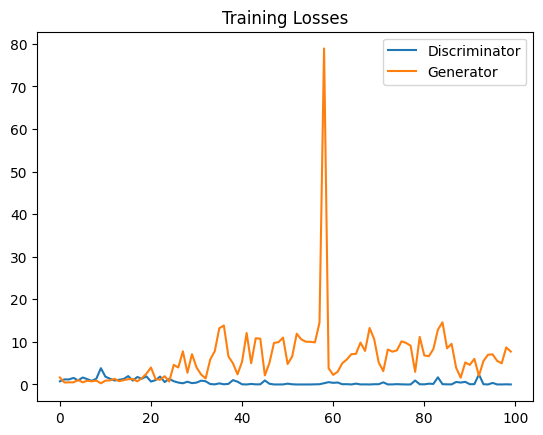

In [13]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()


### Laden des Bildes

In [14]:
# Load samples from generator taken while training.
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

### Anzeigen eines einzelnen Bildes in Farbe:


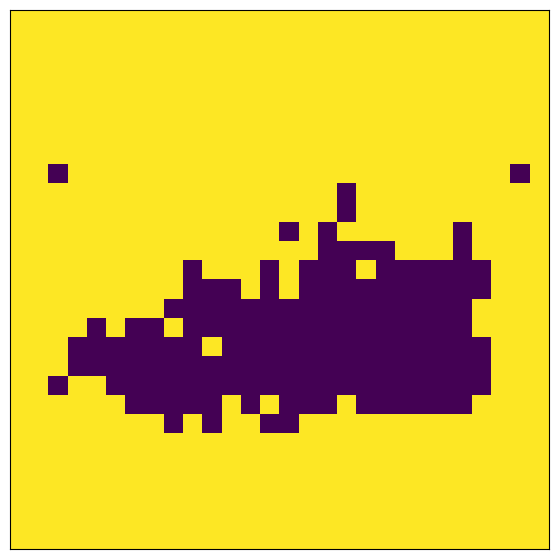

In [15]:
# Annahme: Wir nehmen das erste Bild aus dem letzten Satz von Beispielen
img = samples[-1][0]  # Das erste Bild aus dem letzten geladenen Batch

# Falls das Bild in einem Tensor-Format vorliegt und detach() benötigt wird (z.B. bei PyTorch)
if isinstance(img, torch.Tensor):
    img = img.detach().cpu().numpy()  # Sicherstellen, dass der Tensor auf der CPU ist und in ein NumPy-Array umgewandelt wird

# Erstellen der Figur
fig, ax = plt.subplots(figsize=(7, 7))

# Verbergen der Achsen
ax.xaxis.set_visible(False)
ax.yaxis.set_visible(False)

# Zeigen des Bildes in Farbe
# Falls das Bild flach ist und umgeformt werden muss (z.B. bei 28x28 RGB Bildern)
img = img.reshape((28, 28))  # Beispiel für 28x28 Pixel Bild mit 3 Farbkanälen (RGB)
im = ax.imshow(img)

plt.show()


### Beispiel für ein RGB-Bild mit der Größe 28x28:


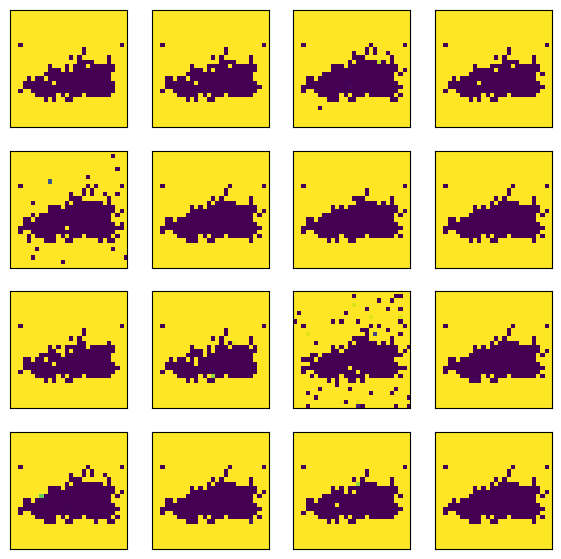

In [16]:
# Load samples from generator taken while training.
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
for ax, img in zip(axes.flatten(), samples[-1]):
    img = img.detach()
    ax.xaxis.set_visible(False)
    ax.yaxis.set_visible(False)
    im = ax.imshow(img.reshape((28,28)))